<a href="https://colab.research.google.com/github/LeannJota/LeannJota/blob/main/TrabalhoVIsualiza%C3%A7%C3%A3oDaInforma%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Carregando o dataset
df = pd.read_csv('/content/Dataset - USD_BRL_hist.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     2608 non-null   object 
 1   USD_BRL  2608 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.9+ KB


In [56]:
df.describe()

,USD_BRL
count,2608.000000
mean,2.751703
std,0.839616
min,1.538300
25%,1.985350
50%,2.653100
75%,3.477100
max,4.263800


In [49]:
# Convertendo a coluna 'Data' para datetime uma única vez
df['Data'] = pd.to_datetime(df['Data'])
# Criando novas colunas a partir da coluna 'Data'
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Dia da Semana'] = df['Data'].dt.dayofweek

# Mapeando os números para os nomes dos dias da semana
dias_da_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df['Dia da Semana'] = df['Dia da Semana'].map(dias_da_semana)

# Exibindo as primeiras linhas para verificar as mudanças
print(df.head())

        Data  USD_BRL   Ano  Mês Dia da Semana
0 2019-12-31   4.0195  2019   12         Terça
1 2019-12-30   4.0195  2019   12       Segunda
2 2019-12-27   4.0460  2019   12         Sexta
3 2019-12-26   4.0560  2019   12        Quinta
4 2019-12-25   4.0838  2019   12        Quarta


<ipython-input-49-830474a99404>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])


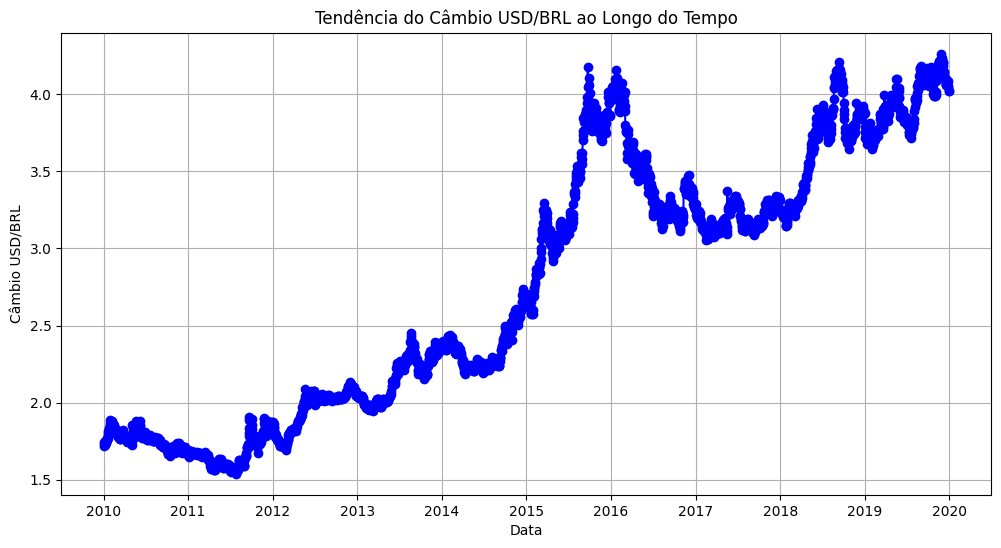

In [50]:
# Gráfico de Linhas
plt.figure(figsize=(12,6))
plt.plot(df['Data'], df['USD_BRL'], color='blue', marker='o')
plt.title('Tendência do Câmbio USD/BRL ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Câmbio USD/BRL')
plt.grid(True)
plt.show()

## Analisando o gráfico de linhas da taxa de câmbio USD/BRL,há uma tendência de alta ao longo dos anos, indicando que :
*   o real se desvalorizou frente ao dólar
*   O pico em 2015 e a queda em 2017, sugerindo influências de crises econômicas e políticas.
*   a tendência de desvalorização do real persiste
*   a reação do mercado a eventos importantes.



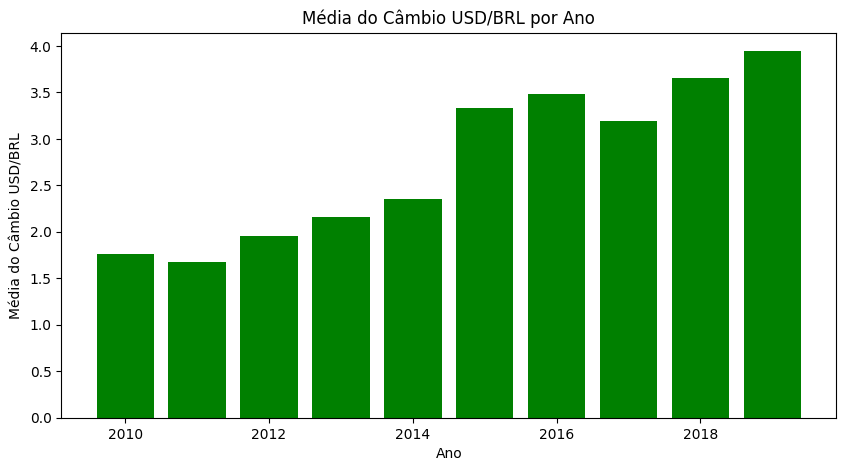

In [51]:
# Gráfico de Barras
# Calcular a média do câmbio por ano
media_por_ano = df.groupby('Ano')['USD_BRL'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(media_por_ano['Ano'], media_por_ano['USD_BRL'], color='green')
plt.title('Média do Câmbio USD/BRL por Ano')
plt.xlabel('Ano')
plt.ylabel('Média do Câmbio USD/BRL')
plt.show()

## Ao examinar o gráfico de barras da média anual da taxa de câmbio USD/BRL, percebo uma:

*  Tendência de Alta: A cada ano, foi preciso mais reais para comprar um dólar.
* Desvalorização do Real: O real se desvalorizou em relação ao dólar ao longo do tempo.
* Influência de Eventos: Eventos no Brasil e no mundo podem ter impactado o câmbio.


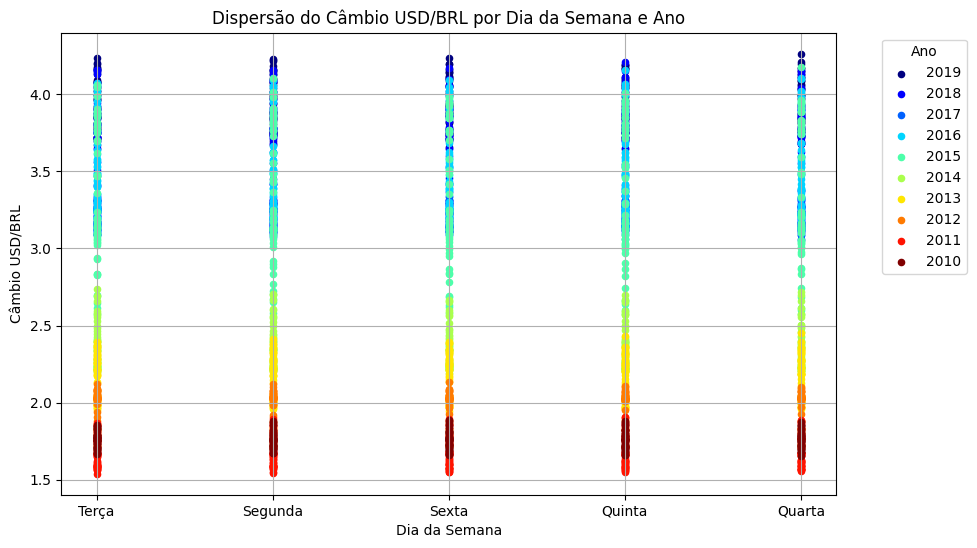

In [52]:
# Criando um dicionário de cores para cada ano
cores_por_ano = {ano: cor for ano, cor in zip(df['Ano'].unique(), plt.cm.jet(np.linspace(0, 1, len(df['Ano'].unique()))))}

# Criando o gráfico de dispersão
plt.figure(figsize=(10,6))
for ano in df['Ano'].unique():
    subset = df[df['Ano'] == ano]
    plt.scatter(subset['Dia da Semana'], subset['USD_BRL'], s=20, c=[cores_por_ano[ano]], label=str(ano))

plt.title('Dispersão do Câmbio USD/BRL por Dia da Semana e Ano')
plt.xlabel('Dia da Semana')
plt.ylabel('Câmbio USD/BRL')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
#Verificando dados finais para auxilio de analise
df.describe()

## Com base no gráfico de dispersão:

* Tendência de Alta: A taxa de câmbio mostrou uma tendência geral de alta ao longo da década.
* Variação Anual: Cada ano apresentou uma cor diferente no gráfico, indicando mudanças na taxa de câmbio ao longo dos anos.
* Dispersão Diária: Os pontos estão distribuídos verticalmente para cada dia da semana, mostrando variação diária na taxa de câmbio.
* Volatilidade: A variação padrão sugere uma volatilidade considerável no câmbio USD/BRL durante o período analisado.
* Dados Estatísticos: O valor mínimo, máximo, médio e a variação padrão do câmbio USD/BRL são refletidos no gráfico.